### Regression -  Weather of Seized(2006-2016)

H2O’s AutoML can be used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. The user can also use a performance metric-based stopping criterion for the AutoML process rather than a specific time constraint. Stacked Ensembles will be automatically trained on the collection individual models to produce a highly predictive ensemble model which, in most cases, will be the top performing model in the AutoML Leaderboard. Stacked ensembles are not yet available for multiclass classification problems, so in that case, only singleton models will be trained.


# Gradient Boosting Machine (GBM)

Gradient Boosting Machine (for Regression and Classification) is a forward learning ensemble method. The guiding heuristic is that good predictive results can be obtained through increasingly refined approximations. H2O’s GBM sequentially builds regression trees on all the features of the dataset in a fully distributed way - each tree is built in parallel.

### Interpreting the GBM Model:

The output for GBM includes the following:

-  Model parameters (hidden)
- A graph of the scoring history (training MSE vs number of trees)
- A graph of the variable importances
- Output (model category, validation metrics, initf)
- Model summary (number of trees, min. depth, max. depth, mean depth, min. leaves, max. leaves, mean leaves)
- Scoring history in tabular format
- Training metrics (model name, model checksum name, frame name, description, model category, duration in ms, scoring time, predictions, MSE, R2)
- Variable importances in tabular format


# Generalized Linear Model (GLM)

Generalized Linear Models (GLM) estimate regression models for outcomes following exponential distributions. In addition to the Gaussian (i.e. normal) distribution, these include Poisson, binomial, and gamma distributions. Each serves a different purpose, and depending on distribution and link function choice, can be used either for prediction or classification.

References:

http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/model_categories.html#module-h2o.model.regression

https://github.com/nikbearbrown/CSYE_7245/tree/master/H2O

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html

https://h2o-release.s3.amazonaws.com/h2o/master/3888/docs-website/h2o-docs/automl.html

In [2]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path=None
all_variables=None
test_path=None
target='Humidity'
nthreads=1 
min_mem_size=6 
run_time=600
classification=False
scale=False
max_models=9    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=0 

In [4]:
data_path='weatherHistory.csv'

In [5]:
data_path = os.path.join(os.path.abspath(os.curdir),data_path)

In [6]:
all_variables=None

In [7]:
run_id=alphabet(9)
# run_id to std out
print (run_id) 

co6h3rrAE


In [8]:
server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_dir)
os.chdir(run_dir) 

In [3]:
# 65535 Highest port no
#port_no=random.randint(5555,55555)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from C:\Users\manan\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\manan\AppData\Local\Temp\tmp4exuzlpv
  JVM stdout: C:\Users\manan\AppData\Local\Temp\tmp4exuzlpv\h2o_Manan_Shukla_started_from_python.out
  JVM stderr: C:\Users\manan\AppData\Local\Temp\tmp4exuzlpv\h2o_Manan_Shukla_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.9
H2O cluster version age:,2 months and 8 days
H2O cluster name:,H2O_from_python_Manan_Shukla_my4xh7
H2O cluster total nodes:,1
H2O cluster free memory:,3.530 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [9]:
# meta data
meta_data = set_meta_data(run_id,analysis,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,nthreads,min_mem_size)
print(meta_data)  

{'run_id': 'co6h3rrAE', 'start_time': 1543901242.9459176, 'target': 'Humidity', 'max_models': 9, 'run_time': 600, 'scale': False, 'classification': False, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1543901242.9459176, 'execution_time': 0.0, 'nthreads': 1, 'min_mem_size': 6, 'analysis': 0}


In [10]:
print(data_path)

C:\Users\raghu\OneDrive\Desktop\Manan\Assignment_2\weatherHistory.csv


In [15]:
df = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
# h2o.connect()

In [17]:
df.describe()

Rows:96453
Cols:12




,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
type,string,enum,enum,real,real,real,real,int,real,int,real,enum
mins,NaN,,,-21.822222222222223,-27.716666666666665,0.0,0.0,0.0,0.0,0.0,0.0,
mean,NaN,,,11.932678437511877,10.855028874166695,0.7348989663359355,10.810640140793952,187.50923247592107,10.347324929240152,0.0,1003.2359558541469,
maxs,NaN,,,39.90555555555555,39.34444444444444,1.0,63.852599999999995,359.0,16.1,0.0,1046.38,
sigma,NaN,,,9.551546320657028,10.69684739211919,0.1954727390672154,6.913571012591992,107.38342838070582,4.192123191422782,0.0,116.96990568258003,
zeros,0,,,325,69,22,1297,2264,450,96453,1288,
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47222222222222,7.388888888888888,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


describe()[source]
Generate an in-depth description of this H2OFrame.

The description is a tabular print of the type, min, max, sigma, number of zeros, and number of missing elements for each H2OVec in this H2OFrame.

Returns:	None (print to stdout) 

In [18]:
# dependent variable
# assign target and inputs for classification or regression
if target==None:
    target=df.columns[-1]   
y = target

In [19]:
print(y)

Humidity


In [20]:
print(all_variables)

None


In [21]:
if all_variables is not None:
    ivd=get_all_variables_csv(all_variables)
    print(ivd)    
    X=check_all_variables(df,ivd,y)
    print(X)

In [22]:
df.describe()

Rows:96453
Cols:12




,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
type,string,enum,enum,real,real,real,real,int,real,int,real,enum
mins,NaN,,,-21.822222222222223,-27.716666666666665,0.0,0.0,0.0,0.0,0.0,0.0,
mean,NaN,,,11.932678437511877,10.855028874166695,0.7348989663359355,10.810640140793952,187.50923247592107,10.347324929240152,0.0,1003.2359558541469,
maxs,NaN,,,39.90555555555555,39.34444444444444,1.0,63.852599999999995,359.0,16.1,0.0,1046.38,
sigma,NaN,,,9.551546320657028,10.69684739211919,0.1954727390672154,6.913571012591992,107.38342838070582,4.192123191422782,0.0,116.96990568258003,
zeros,0,,,325,69,22,1297,2264,450,96453,1288,
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47222222222222,7.388888888888888,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [23]:
# independent variables

X = []  
if all_variables is None:
    X=get_independent_variables(df, target)  
else: 
    ivd=get_all_variables_csv(all_variables)    
    X=check_all_variables(df, ivd)


X=check_X(X,df)


# Add independent variables

meta_data['X']=X  


# impute missing values

_=impute_missing_values(df,X, scale)

In [24]:
if analysis == 3:
    classification=False
elif analysis == 2:
    classification=True
elif analysis == 1:
    classification=True

In [25]:
print(classification)

False


In [26]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    df[y] = df[y].asfactor()

In [27]:
df.types.items()

dict_items([('Formatted Date', 'string'), ('Summary', 'enum'), ('Precip Type', 'enum'), ('Temperature (C)', 'real'), ('Apparent Temperature (C)', 'real'), ('Humidity', 'real'), ('Wind Speed (km/h)', 'real'), ('Wind Bearing (degrees)', 'int'), ('Visibility (km)', 'real'), ('Loud Cover', 'int'), ('Pressure (millibars)', 'real'), ('Daily Summary', 'enum')])

In [28]:
def check_y(y,df):
    ok=False
    C = [name for name in df.columns if name == y]
    for key, val in df.types.items():
        if key in C:
            if val in ['real','int','enum']:        
                ok=True         
                return ok, val   

In [29]:
ok,val=check_y(y,df)

In [30]:
print(val)

real


In [31]:
print(ok)

True


In [32]:
if val=='enum':
    print(df[y].levels())

In [33]:
df.describe()

Rows:96453
Cols:12




,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
type,string,enum,enum,real,real,real,real,int,real,int,real,enum
mins,NaN,,,-21.822222222222223,-27.716666666666665,0.0,0.0,0.0,0.0,0.0,0.0,
mean,NaN,,,11.932678437511877,10.855028874166695,0.7348989663359355,10.810640140793952,187.50923247592107,10.347324929240152,0.0,1003.2359558541469,
maxs,NaN,,,39.90555555555555,39.34444444444444,1.0,63.852599999999995,359.0,16.1,0.0,1046.38,
sigma,NaN,,,9.551546320657028,10.69684739211919,0.1954727390672154,6.913571012591992,107.38342838070582,4.192123191422782,0.0,116.96990568258003,
zeros,0,,,325,69,22,1297,2264,450,96453,1288,
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47222222222222,7.388888888888888,0.89,14.1197,251.0,15.826300000000002,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355555555555558,7.227777777777776,0.86,14.2646,259.0,15.826300000000002,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377777777777778,9.377777777777778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [34]:
allV=get_variables_types(df)
allV

{'Apparent Temperature (C)': 'real',
 'Daily Summary': 'enum',
 'Formatted Date': 'string',
 'Humidity': 'real',
 'Loud Cover': 'int',
 'Precip Type': 'enum',
 'Pressure (millibars)': 'real',
 'Summary': 'enum',
 'Temperature (C)': 'real',
 'Visibility (km)': 'real',
 'Wind Bearing (degrees)': 'int',
 'Wind Speed (km/h)': 'real'}

In [35]:
meta_data['variables']=allV

In [36]:
# split into training and test for showing how to predict
train, test = df.split_frame([0.9])

### Set up AutoML

In [42]:
aml = H2OAutoML(max_runtime_secs=run_time,project_name = name)

In [43]:
model_start_time = time.time()

In [44]:
aml.train(x=X,y=y,training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [45]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [96]:
# get leaderboard
aml_leaderboard_df=aml.leaderboard.as_data_frame()

In [97]:
aml_leaderboard_df

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,StackedEnsemble_AllModels_0_AutoML_20181015_20...,0.007832,0.088500,0.007832,0.063720,0.053632
1,GBM_grid_0_AutoML_20181015_203332_model_2,0.007965,0.089244,0.007965,0.064542,0.054073
2,GBM_grid_0_AutoML_20181015_203332_model_3,0.008270,0.090942,0.008270,0.065706,0.055115
3,GBM_grid_0_AutoML_20181015_203332_model_1,0.008328,0.091260,0.008328,0.066379,0.055318
4,GBM_grid_0_AutoML_20181015_203332_model_0,0.008359,0.091426,0.008359,0.066495,0.055436
5,StackedEnsemble_AllModels_0_AutoML_20181015_20...,0.008465,0.092007,0.008465,0.066180,0.055784
6,StackedEnsemble_BestOfFamily_0_AutoML_20181015...,0.008465,0.092007,0.008465,0.066180,0.055784
7,DRF_0_AutoML_20181015_202529,0.008501,0.092200,0.008501,0.066679,0.055922
8,DRF_0_AutoML_20181015_203332,0.008548,0.092454,0.008548,0.066701,0.056101
9,XRT_0_AutoML_20181015_202529,0.009502,0.097476,0.009502,0.071532,0.059201


In [98]:
# STart best model as first model
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])

In [99]:
mod_best._id

'StackedEnsemble_AllModels_0_AutoML_20181015_203332'

In [100]:
# Get stacked ensemble  
se=.get_stacked_ensemble(model_set)

In [101]:
print(se)

StackedEnsemble_BestOfFamily_0_AutoML_20181015_202529


In [102]:
if se is not None:
    mod_best=h2o.get_model(se)

In [103]:
mod_best._id

'StackedEnsemble_BestOfFamily_0_AutoML_20181015_202529'

In [159]:
import numpy as np
bestmod_pred = mod_best.predict(test_data=test)
bestmod_rmse = np.sqrt(((bestmod_pred['predict']-test['Humidity'])**2).mean())

In [160]:
bestmod_rmse

array([0.08907098])

In [104]:
mod_best._get_metrics

<function h2o.model.model_base.ModelBase._get_metrics(o, train, valid, xval)>

In [105]:
type(mod_best)

h2o.estimators.stackedensemble.H2OStackedEnsembleEstimator

In [106]:
mods=mod_best.coef_norm
print(mods)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_0_AutoML_20181015_202529
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0019913573429538043
RMSE: 0.04462462709036126
MAE: 0.03208603572501131
RMSLE: 0.026991160069685292
R^2: 0.9478478226395249
Mean Residual Deviance: 0.0019913573429538043
Null degrees of freedom: 69521
Residual degrees of freedom: 69520
Null deviance: 2654.5995240026555
Residual deviance: 138.4431451968344
AIC: -235052.17320805998

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.008735531460662572
RMSE: 0.09346406507670513
MAE: 0.0672522070968295
RMSLE: 0.05692680253897736
R^2: 0.7738328645401157
Mean Residual Deviance: 0.008735531460662572
Null degrees of freedom: 17302
Residual degrees of freedom: 17301
Null deviance: 668.3241584761549
Residual deviance: 151.15090086384447
AIC: -32912.6015457028

ModelMetricsR

In [107]:
bm=stackedensemble_df(aml_leaderboard_df)

In [108]:
bm

['GBM_grid_0_AutoML_20181015_203332_model_2',
 'GLM_grid_0_AutoML_20181015_203332_model_0',
 'DRF_0_AutoML_20181015_202529',
 'XRT_0_AutoML_20181015_202529']

In [93]:
aml_leaderboard_df

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
0,StackedEnsemble_AllModels_0_AutoML_20181015_20...,0.007832,0.088500,0.007832,0.063720,0.053632
1,GBM_grid_0_AutoML_20181015_203332_model_2,0.007965,0.089244,0.007965,0.064542,0.054073
2,GBM_grid_0_AutoML_20181015_203332_model_3,0.008270,0.090942,0.008270,0.065706,0.055115
3,GBM_grid_0_AutoML_20181015_203332_model_1,0.008328,0.091260,0.008328,0.066379,0.055318
4,GBM_grid_0_AutoML_20181015_203332_model_0,0.008359,0.091426,0.008359,0.066495,0.055436
5,StackedEnsemble_AllModels_0_AutoML_20181015_20...,0.008465,0.092007,0.008465,0.066180,0.055784
6,StackedEnsemble_BestOfFamily_0_AutoML_20181015...,0.008465,0.092007,0.008465,0.066180,0.055784
7,DRF_0_AutoML_20181015_202529,0.008501,0.092200,0.008501,0.066679,0.055922
8,DRF_0_AutoML_20181015_203332,0.008548,0.092454,0.008548,0.066701,0.056101
9,XRT_0_AutoML_20181015_202529,0.009502,0.097476,0.009502,0.071532,0.059201


In [137]:
#  Get best_models and coef_norm()
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
    if 'Intercept' in best_models.keys():
        del best_models['Intercept']
    bm=list(best_models.keys())
else:
    best_models={}
    bm=stackedensemble_df(aml_leaderboard_df)   
    for b in bm:   
        best_models[b]=None

if mod_best.model_id not in bm:
    bm.append(mod_best.model_id)

No metalearner for this model


In [138]:
bm

['GBM_grid_0_AutoML_20181015_203332_model_2',
 'GLM_grid_0_AutoML_20181015_203332_model_0',
 'DRF_0_AutoML_20181015_202529',
 'XRT_0_AutoML_20181015_202529']

In [139]:
# Best of Family leaderboard
aml_leaderboard_df=aml_leaderboard_df.loc[aml_leaderboard_df['model_id'].isin(bm)]

In [140]:
aml_leaderboard_df

,model_id,mean_residual_deviance,rmse,mse,mae,rmsle
1,GBM_grid_0_AutoML_20181015_203332_model_2,0.007965,0.089244,0.007965,0.064542,0.054073
7,DRF_0_AutoML_20181015_202529,0.008501,0.092200,0.008501,0.066679,0.055922
9,XRT_0_AutoML_20181015_202529,0.009502,0.097476,0.009502,0.071532,0.059201
11,GLM_grid_0_AutoML_20181015_203332_model_0,0.016562,0.128693,0.016562,0.101295,0.077529


In [141]:
# save leaderboard
leaderboard_stats=run_id+'_leaderboard.csv'
aml_leaderboard_df.to_csv(leaderboard_stats)

In [142]:
top=aml_leaderboard_df.iloc[0]['model_id']
print(top)

GBM_grid_0_AutoML_20181015_203332_model_2


In [143]:
mod_best=h2o.get_model(top)
print(mod_best._id)
print(mod_best.algo)

GBM_grid_0_AutoML_20181015_203332_model_2
gbm


In [144]:
meta_data['mod_best']=mod_best._id
meta_data['mod_best_algo']=mod_best.algo

In [145]:
meta_data['models']=bm

In [146]:
models_path=os.path.join(run_dir,'models')
for mod in bm:
    try:   
        m=h2o.get_model(mod) 
        h2o.save_model(m, path = models_path)
    except:    
        pass    

### Individual Models

#### Gradient Boosting Machine

In [134]:
gbm_mod,mod_id=get_model_by_algo("GBM",best_models)
if mod is not None:
    try:     
        sh_df=mod.scoring_history()
        sh_df.to_csv(run_id+'_gbm_scoring_history.csv') 
    except:
        pass   
    try:     
        stats_gbm={}
        stats_gbm=gbm_stats(mod)
        n=run_id+'_gbm_stats.json'
        dict_to_json(stats_gbm,n)
        print(stats_gbm)
    except:
        pass        

{'algo': 'gbm', 'model_id': 'GBM_grid_0_AutoML_20181015_203332_model_2', 'varimp': [('Temperature (C)', 3707.857666015625, 1.0, 0.34944264064131936), ('Apparent Temperature (C)', 2522.54443359375, 0.680323966239086, 0.23773420325416197), ('Visibility (km)', 1630.780029296875, 0.43981732207354984, 0.1536909264251749), ('Daily Summary', 1192.1846923828125, 0.3215292494395842, 0.11235602996758975), ('Wind Speed (km/h)', 560.8402709960938, 0.15125722762674418, 0.0528557250379746), ('Summary', 486.37030029296875, 0.13117286155582414, 0.04583739112254538), ('Pressure (millibars)', 295.47412109375, 0.07968863632547671, 0.027846607506680342), ('Wind Bearing (degrees)', 205.4799041748047, 0.055417419621613596, 0.01936520945010472), ('Precip Type', 9.2448148727417, 0.0024933036015581354, 0.0008712665944489868)]}


#### Gradient Random Tree

In [152]:
xrt_mod,mod_id=get_model_by_algo("XRT",best_models)
if mod is not None:
    try:     
        sh_df=mod.scoring_history()
        sh_df.to_csv(run_id+'_xrt_scoring_history.csv')
    except:
        pass     
    try:        
        stats_xrt={}
        stats_xrt=xrt_stats(mod)
        n=run_id+'_xrt_stats.json'
        dict_to_json(stats_xrt,n)
        print(stats_xrt)
    except:
        pass   

#### Generalized Linear Models

In [151]:
glm_mod,mod_id=get_model_by_algo("GLM",best_models)
if mod is not None:
    try:     
        stats_glm={}
        stats_glm=glm_stats(mod)
        n=run_id+'_glm_stats.json'
        dict_to_json(stats_glm,n)
        print(stats_glm)
    except:
         pass     

{'algo': 'glm', 'model_id': 'GLM_grid_0_AutoML_20181015_203332_model_0', 'coef': {'Intercept': 0.9844063052057124, 'Daily Summary.Breezy and foggy starting in the evening.': 0.17834156761485634, 'Daily Summary.Breezy and foggy until morning.': -0.015051057125364444, 'Daily Summary.Breezy and mostly cloudy overnight.': -0.019043427145699805, 'Daily Summary.Breezy and partly cloudy in the afternoon.': -0.055075045612789315, 'Daily Summary.Breezy in the morning and foggy in the evening.': 0.04253605281130495, 'Daily Summary.Breezy in the morning and mostly cloudy starting in the evening.': -0.06242537447873812, 'Daily Summary.Breezy in the morning and mostly cloudy starting in the morning.': -0.12169368279575561, 'Daily Summary.Breezy in the morning and partly cloudy starting in the evening continuing until night.': -0.035747893038265526, 'Daily Summary.Breezy overnight and mostly cloudy throughout the day.': 0.10335978168768328, 'Daily Summary.Breezy overnight and overcast throughout the

#### Statistics for Gradient Boosting Machine

In [164]:
gbm_pred = gbm_mod.predict(test_data=test)
gbm_rmse = np.sqrt(((gbm_pred['predict']-test['Humidity'])**2).mean())
print('RMSE value of GBM model is: ',gbm_rmse)

gbm prediction progress: |████████████████████████████████████████████████| 100%
RMSE value of GBM model is:  [0.08907098]


In [162]:
gbm_mod

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_0_AutoML_20181015_203332_model_2


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.006198028056959668
RMSE: 0.07872755589347143
MAE: 0.05617399607504773
RMSLE: 0.047625882064780106
Mean Residual Deviance: 0.006198028056959668

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.008170635799971977
RMSE: 0.09039156929698686
MAE: 0.06581081226700904
RMSLE: 0.05504585661573072
Mean Residual Deviance: 0.008170635799971977

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.00796451494615675
RMSE: 0.08924413115805852
MAE: 0.0645419806723096
RMSLE: 0.0540734232429073
Mean Residual Deviance: 0.00796451494615675
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.0645420,0.0004045,0.0644370,0.0641779,0.0637270,0.0651380,0.0652300
mean_residual_deviance,0.0079645,0.0000534,0.0079383,0.0079085,0.0078711,0.0080352,0.0080695
mse,0.0079645,0.0000534,0.0079383,0.0079085,0.0078711,0.0080352,0.0080695
r2,0.7914136,0.0014373,0.7915611,0.7930189,0.7941545,0.7896414,0.7886919
residual_deviance,0.0079645,0.0000534,0.0079383,0.0079085,0.0078711,0.0080352,0.0080695
rmse,0.0892431,0.0002993,0.0890970,0.0889300,0.0887192,0.0896390,0.0898304
rmsle,0.0540731,0.0001285,0.0540174,0.0539793,0.0538141,0.0542407,0.0543141


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-10-15 20:43:00,1 min 1.698 sec,0.0,0.1954062,0.1628521,0.0381836,0.1965318,0.1633483,0.0386248
,2018-10-15 20:43:00,1 min 1.967 sec,5.0,0.1452737,0.1209995,0.0211044,0.1475300,0.1223592,0.0217651
,2018-10-15 20:43:00,1 min 2.237 sec,10.0,0.1194522,0.0974155,0.0142688,0.1225773,0.0994852,0.0150252
,2018-10-15 20:43:01,1 min 2.495 sec,15.0,0.1064595,0.0838722,0.0113336,0.1104974,0.0866987,0.0122097
,2018-10-15 20:43:01,1 min 2.744 sec,20.0,0.0996176,0.0762119,0.0099237,0.1042317,0.0796355,0.0108642
---,---,---,---,---,---,---,---,---,---
,2018-10-15 20:43:09,1 min 10.796 sec,180.0,0.0795361,0.0567883,0.0063260,0.0906362,0.0660083,0.0082149
,2018-10-15 20:43:09,1 min 11.060 sec,185.0,0.0793046,0.0566056,0.0062892,0.0905600,0.0659478,0.0082011
,2018-10-15 20:43:09,1 min 11.317 sec,190.0,0.0790785,0.0564350,0.0062534,0.0904830,0.0658839,0.0081872
,2018-10-15 20:43:10,1 min 11.562 sec,195.0,0.0789300,0.0563217,0.0062299,0.0904538,0.0658654,0.0081819



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Temperature (C),3707.8576660,1.0,0.3494426
Apparent Temperature (C),2522.5444336,0.6803240,0.2377342
Visibility (km),1630.7800293,0.4398173,0.1536909
Daily Summary,1192.1846924,0.3215292,0.1123560
Wind Speed (km/h),560.8402710,0.1512572,0.0528557
Summary,486.3703003,0.1311729,0.0458374
Pressure (millibars),295.4741211,0.0796886,0.0278466
Wind Bearing (degrees),205.4799042,0.0554174,0.0193652
Precip Type,9.2448149,0.0024933,0.0008713


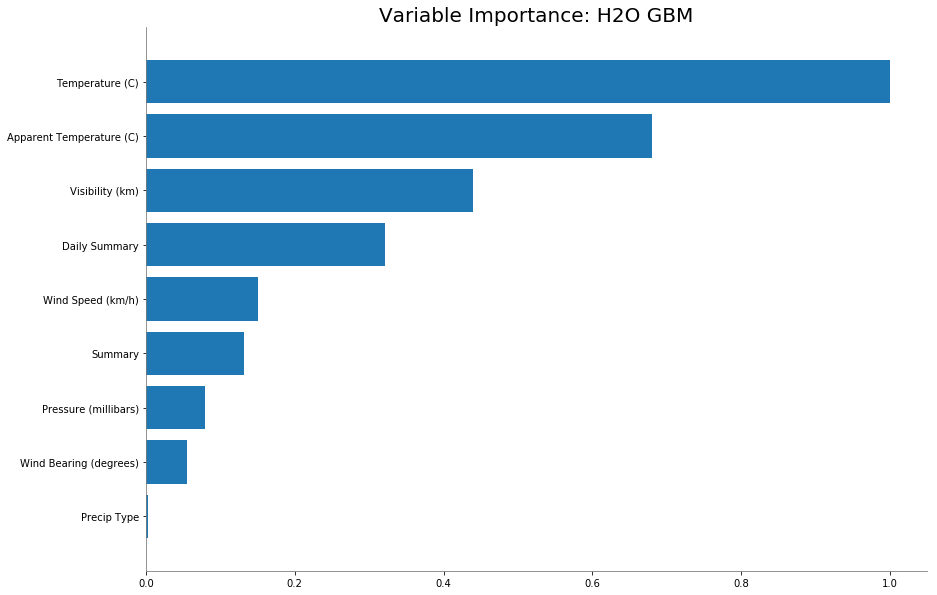

In [161]:
gbm_mod.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model GBM_grid_0_AutoML_20181011_214137_model_1 on column 'Temperature (C)'



temperature_c,mean_response,stddev_response,std_error_mean_response
-21.8222222,0.7490935,0.1068602,0.0003441
-18.5733918,0.7444041,0.1067466,0.0003437
-15.3245614,0.7241533,0.1039941,0.0003349
-12.0757310,0.7648939,0.1108020,0.0003568
-8.8269006,0.7693803,0.1142210,0.0003678
-5.5780702,0.7740865,0.1144113,0.0003684
-2.3292398,0.7788718,0.1195266,0.0003849
0.9195906,0.7740516,0.1195497,0.0003849
4.1684211,0.7778143,0.1216594,0.0003917
7.4172515,0.7641221,0.1283063,0.0004131


PartialDependence: Partial Dependence Plot of model GBM_grid_0_AutoML_20181011_214137_model_1 on column 'Wind Speed (km/h)'



wind_speed_kmh,mean_response,stddev_response,std_error_mean_response
0.0,0.7810238,0.1433506,0.0004616
3.3606632,0.7727810,0.1579627,0.0005086
6.7213263,0.7627563,0.1596483,0.0005141
10.0819895,0.7382279,0.1638857,0.0005277
13.4426526,0.7164114,0.1667069,0.0005368
16.8033158,0.7006891,0.1698710,0.0005470
20.1639789,0.6881766,0.1713880,0.0005519
23.5246421,0.6683175,0.1750769,0.0005637
26.8853053,0.6601707,0.1751525,0.0005640
30.2459684,0.6478971,0.1754904,0.0005651


[, ]

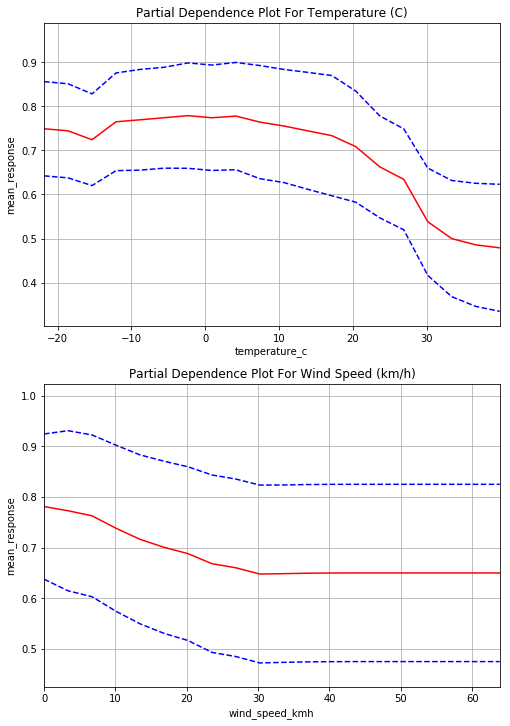

In [74]:

mod.partial_plot(data=df,cols=['Temperature (C)','Wind Speed (km/h)'])

#### Statistics for Gradient Random Tree

In [166]:
xrt_pred = xrt_mod.predict(test_data=test)
xrt_rmse = np.sqrt(((xrt_pred['predict']-test['Humidity'])**2).mean())
print('RMSE value of GBM model is: ',xrt_rmse)

drf prediction progress: |████████████████████████████████████████████████| 100%
RMSE value of GBM model is:  [0.09681685]


In [167]:
xrt_mod

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  XRT_0_AutoML_20181015_202529


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.009800587542690432
RMSE: 0.09899791686035839
MAE: 0.07256004115145867
RMSLE: 0.06007781252912462
Mean Residual Deviance: 0.009800587542690432

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.00981266951468527
RMSE: 0.09905891941004237
MAE: 0.0725682224803065
RMSLE: 0.06044062381300979
Mean Residual Deviance: 0.00981266951468527

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.009501533545596368
RMSE: 0.09747581005355312
MAE: 0.0715322623068607
RMSLE: 0.05920093880695985
Mean Residual Deviance: 0.009501533545596368
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.0715323,0.0001950,0.0720438,0.0712319,0.0714025,0.0714278,0.0715553
mean_residual_deviance,0.0095015,0.0000583,0.0096451,0.0094158,0.0095067,0.0094251,0.0095149
mse,0.0095015,0.0000583,0.0096451,0.0094158,0.0095067,0.0094251,0.0095149
r2,0.7511579,0.0017277,0.7467434,0.7535714,0.7513806,0.7532525,0.7508419
residual_deviance,0.0095015,0.0000583,0.0096451,0.0094158,0.0095067,0.0094251,0.0095149
rmse,0.0974749,0.0002987,0.0982096,0.097035,0.0975023,0.0970830,0.0975445
rmsle,0.0592003,0.0001911,0.0597034,0.0590675,0.0592228,0.0589121,0.0590957


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-10-15 20:31:30,2 min 41.237 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-10-15 20:31:30,2 min 41.848 sec,1.0,0.1296936,0.0913896,0.0168204,0.1310527,0.0920809,0.0171748
,2018-10-15 20:31:31,2 min 42.531 sec,2.0,0.1265253,0.0896385,0.0160086,0.1166508,0.0833754,0.0136074
,2018-10-15 20:31:32,2 min 43.195 sec,3.0,0.1232784,0.0873842,0.0151976,0.1103848,0.0798043,0.0121848
,2018-10-15 20:31:32,2 min 43.788 sec,4.0,0.1202243,0.0854929,0.0144539,0.1070220,0.0776439,0.0114537
,2018-10-15 20:31:33,2 min 44.462 sec,5.0,0.1183243,0.0843424,0.0140006,0.1060967,0.0772150,0.0112565
,2018-10-15 20:31:34,2 min 45.174 sec,6.0,0.1161146,0.0830032,0.0134826,0.1048936,0.0763548,0.0110027
,2018-10-15 20:31:38,2 min 49.863 sec,11.0,0.1081432,0.0782948,0.0116949,0.1017149,0.0742290,0.0103459
,2018-10-15 20:31:43,2 min 54.192 sec,18.0,0.1035807,0.0756948,0.0107290,0.1004720,0.0735261,0.0100946
,2018-10-15 20:31:48,2 min 59.100 sec,25.0,0.1014148,0.0742497,0.0102850,0.0999341,0.0731523,0.0099868


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Temperature (C),25819.8183594,1.0,0.2397373
Apparent Temperature (C),22853.3652344,0.8851095,0.2121938
Visibility (km),20599.3515625,0.7978116,0.1912652
Daily Summary,19718.9843750,0.7637151,0.1830910
Summary,6565.5424805,0.2542831,0.0609611
Wind Speed (km/h),5992.2294922,0.2320787,0.0556379
Wind Bearing (degrees),3132.2292480,0.1213110,0.0290828
Pressure (millibars),2537.5803223,0.0982803,0.0235615
Precip Type,481.3542175,0.0186428,0.0044694


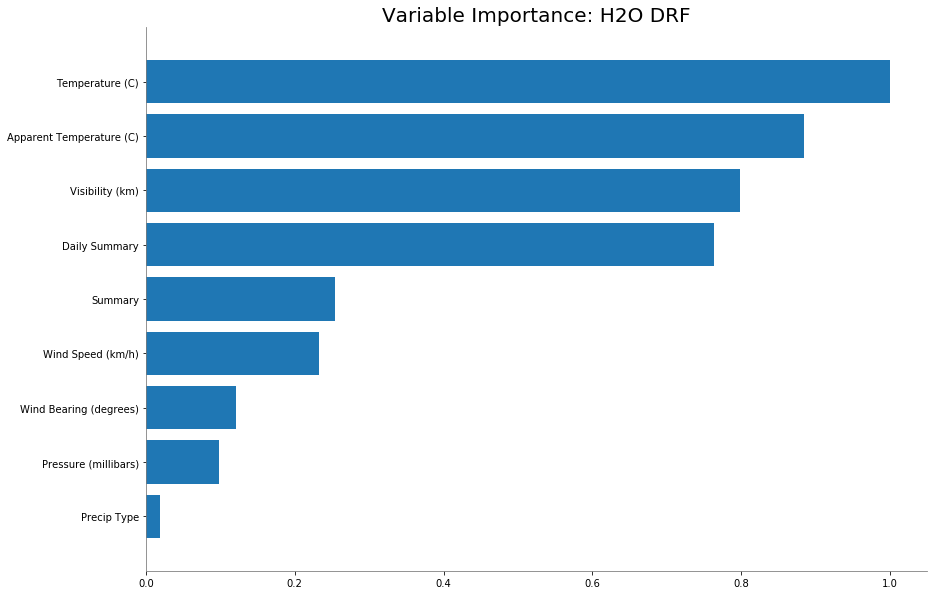

In [154]:
xrt_mod.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model DRF_0_AutoML_20181011_214137 on column 'Temperature (C)'



temperature_c,mean_response,stddev_response,std_error_mean_response
-21.8222222,0.7191022,0.0956830,0.0003081
-18.5733918,0.7191770,0.0958195,0.0003085
-15.3245614,0.7275437,0.1032117,0.0003323
-12.0757310,0.7475001,0.1124809,0.0003622
-8.8269006,0.7602262,0.1134276,0.0003652
-5.5780702,0.7630374,0.1151949,0.0003709
-2.3292398,0.7668264,0.1199527,0.0003862
0.9195906,0.7668080,0.1198658,0.0003860
4.1684211,0.7678405,0.1226986,0.0003951
7.4172515,0.7605764,0.1249488,0.0004023


PartialDependence: Partial Dependence Plot of model DRF_0_AutoML_20181011_214137 on column 'Wind Speed (km/h)'



wind_speed_kmh,mean_response,stddev_response,std_error_mean_response
0.0,0.7631558,0.1472062,0.0004740
3.3606632,0.7659575,0.1567093,0.0005046
6.7213263,0.7620149,0.1572351,0.0005063
10.0819895,0.7361930,0.1617563,0.0005208
13.4426526,0.7148406,0.1647304,0.0005304
16.8033158,0.6998723,0.1677282,0.0005401
20.1639789,0.6892985,0.1689295,0.0005439
23.5246421,0.6782025,0.1707027,0.0005496
26.8853053,0.6737308,0.1708641,0.0005502
30.2459684,0.6722554,0.1695711,0.0005460


[, ]

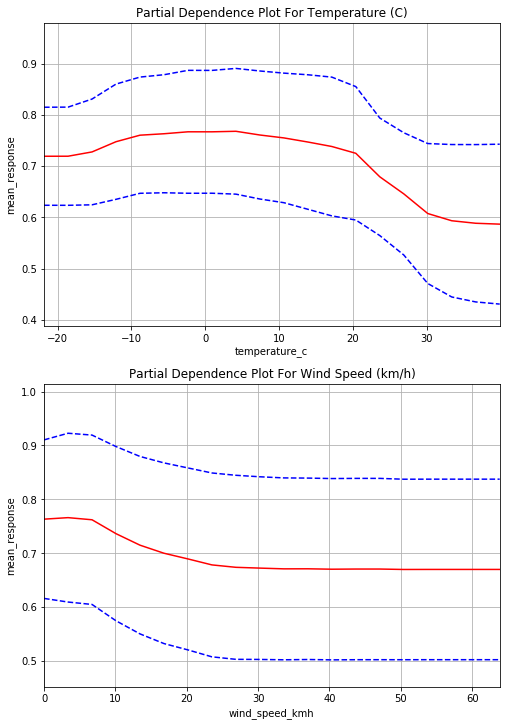

In [81]:
mod.partial_plot(data=df,cols=['Temperature (C)','Wind Speed (km/h)'])

#### Statistics for Generelized Linear Model

In [169]:
glm_pred = glm_mod.predict(test_data=test)
glm_rmse = np.sqrt(((glm_pred['predict']-test['Humidity'])**2).mean())
print('RMSE value of GLM model is: ',glm_rmse)

glm prediction progress: |████████████████████████████████████████████████| 100%
RMSE value of GLM model is:  [0.12797623]


PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model GLM_grid_0_AutoML_20181011_214137_model_0 on column 'Temperature (C)'



temperature_c,mean_response,stddev_response,std_error_mean_response
-21.8222222,1.5364479,0.1295020,0.0004170
-18.5733918,1.4592993,0.1295020,0.0004170
-15.3245614,1.3821507,0.1295020,0.0004170
-12.0757310,1.3050021,0.1295020,0.0004170
-8.8269006,1.2278535,0.1295020,0.0004170
-5.5780702,1.1507050,0.1295020,0.0004170
-2.3292398,1.0735564,0.1295020,0.0004170
0.9195906,0.9964078,0.1295020,0.0004170
4.1684211,0.9192592,0.1295020,0.0004170
7.4172515,0.8421106,0.1295020,0.0004170


PartialDependence: Partial Dependence Plot of model GLM_grid_0_AutoML_20181011_214137_model_0 on column 'Wind Speed (km/h)'



wind_speed_kmh,mean_response,stddev_response,std_error_mean_response
0.0,0.8017611,0.1399040,0.0004505
3.3606632,0.7809715,0.1399040,0.0004505
6.7213263,0.7601819,0.1399040,0.0004505
10.0819895,0.7393923,0.1399040,0.0004505
13.4426526,0.7186027,0.1399040,0.0004505
16.8033158,0.6978131,0.1399040,0.0004505
20.1639789,0.6770235,0.1399040,0.0004505
23.5246421,0.6562339,0.1399040,0.0004505
26.8853053,0.6354443,0.1399040,0.0004505
30.2459684,0.6146548,0.1399040,0.0004505


[, ]

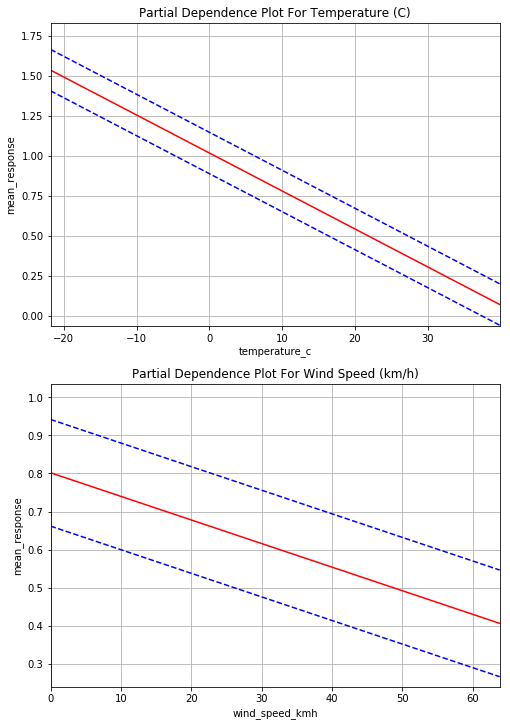

In [87]:
mod.partial_plot(data=df,cols=['Temperature (C)','Wind Speed (km/h)'])

### Predictions

In [88]:
predictions_df=predictions_test(mod_best,test,run_id)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [89]:
predictions_df.head()

predict
0.79534
0.763116
0.68357
0.605276
0.773588
0.856591
0.522423
0.889351
0.868121
0.887346


In [172]:
gbm_pred = gbm_mod.predict(test_data=test)
gbm_rmse = np.sqrt(((gbm_pred['predict']-test['Humidity'])**2).mean())
print('RMSE value for GBM model is: ',gbm_rmse)

gbm prediction progress: |████████████████████████████████████████████████| 100%
RMSE value for GBM model is:  [0.08907098]


In [174]:
xrt_pred = xrt_mod.predict(test_data=test)
xrt_rmse = np.sqrt(((xrt_pred['predict']-test['Humidity'])**2).mean())
print('RMSE value for best model is: ',xrt_rmse)

drf prediction progress: |████████████████████████████████████████████████| 100%
RMSE value for best model is:  [0.09681685]


In [175]:
glm_pred = glm_mod.predict(test_data=test)
glm_rmse = np.sqrt(((glm_pred['predict']-test['Humidity'])**2).mean())
print('RMSE value for best model is: ',glm_rmse)

glm prediction progress: |████████████████████████████████████████████████| 100%
RMSE value for best model is:  [0.12797623]


## Prediction Analysis:


| Algorithms                         | Accuracy     |
|------------- ------------          | ------------ |
| GBM Model                          |**0.0890**    |
| GLM Model                          |**0.1279**    |
| XRT Model                          |**0.096**    |

* Based on the above table we can infer that the GBM model is giving us the best results.
* Even though the mean square error was lest for Best of family model, but when comes to prediction the GBM is performing better.


In [176]:
# Update and save meta data
meta_data['end_time'] = time.time()
meta_data['execution_time'] = meta_data['end_time'] - meta_data['start_time']
  
n=run_id+'_meta_data.json'
dict_to_json(meta_data,n)    


In [177]:
meta_data

{'run_id': 'i6ENVuJA3',
 'start_time': 1539649512.7711866,
 'target': 'Humidity',
 'max_models': 9,
 'run_time': 333,
 'scale': False,
 'classification': False,
 'balance': False,
 'balance_threshold': 0.2,
 'project': None,
 'end_time': 1539653108.9373126,
 'execution_time': 3596.166126012802,
 'nthreads': 1,
 'min_mem_size': 6,
 'analysis': 0,
 'X': ['Wind Bearing (degrees)',
  'Loud Cover',
  'Summary',
  'Precip Type',
  'Daily Summary',
  'Formatted Date',
  'Temperature (C)',
  'Apparent Temperature (C)',
  'Wind Speed (km/h)',
  'Visibility (km)',
  'Pressure (millibars)'],
 'variables': {'Formatted Date': 'string',
  'Summary': 'enum',
  'Precip Type': 'enum',
  'Temperature (C)': 'real',
  'Apparent Temperature (C)': 'real',
  'Humidity': 'real',
  'Wind Speed (km/h)': 'real',
  'Wind Bearing (degrees)': 'int',
  'Visibility (km)': 'real',
  'Loud Cover': 'int',
  'Pressure (millibars)': 'real',
  'Daily Summary': 'enum'},
 'model_execution_time': 657.7590003013611,
 'mod_best

In [ ]:
# Clean up
os.chdir(server_path)

In [ ]:
h2o.cluster().shutdown()